In [150]:
import pandas as pd
import numpy as np

In [151]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [152]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


<h3><center>Finding Missing Values</h3>

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)

    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    ms= ms[ms["Percent"] > 0]

    return ms

In [155]:
def get_missing_info():
    print('---'*10)
    print('Missing values training data')
    print('---'*10)
    print(missing_data(train_df))
    print()
    print('---'*10)
    print('Missing values testing data')
    print('---'*10)
    print(missing_data(test_df))

In [156]:
get_missing_info()

------------------------------
Missing values training data
------------------------------
          Total    Percent
Cabin       687  77.104377
Age         177  19.865320
Embarked      2   0.224467

------------------------------
Missing values testing data
------------------------------
       Total    Percent
Cabin    327  78.229665
Age       86  20.574163
Fare       1   0.239234


<h3><center>Filling missing values and dropping cabin(almost 75% empty)</h3>

In [157]:
print(train_df['Embarked'].value_counts())
print(train_df['Embarked'].mode()[0])
print('---'*10)
print(test_df['Embarked'].value_counts())
print(test_df['Embarked'].mode()[0])

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S
------------------------------
S    270
C    102
Q     46
Name: Embarked, dtype: int64
S


In [158]:
train_df['Age'].fillna(value=train_df['Age'].median(),inplace=True)
train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0],inplace=True)

test_df['Age'].fillna(value=test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(value=test_df['Fare'].mean(),inplace=True)

In [159]:
get_missing_info()

------------------------------
Missing values training data
------------------------------
       Total    Percent
Cabin    687  77.104377

------------------------------
Missing values testing data
------------------------------
       Total    Percent
Cabin    327  78.229665


In [160]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

In [161]:
get_missing_info()

------------------------------
Missing values training data
------------------------------
Empty DataFrame
Columns: [Total, Percent]
Index: []

------------------------------
Missing values testing data
------------------------------
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [162]:
print('---'*12)
print('check the nan value in train data')
print('---'*12)
print(train_df.isnull().sum())
print('---'*12)
print('check the nan value in test data')
print('---'*12)
print(test_df.isnull().sum())

------------------------------------
check the nan value in train data
------------------------------------
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------------------
check the nan value in test data
------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [163]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [164]:
drop_col = ['Name','Ticket']

train_df.drop(labels=drop_col,axis=1,inplace=True)
test_df.drop(labels=drop_col,axis=1,inplace=True)

In [165]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [166]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1

In [167]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [168]:
sex_train = pd.get_dummies(train_df['Sex'])
sex_test = pd.get_dummies(test_df['Sex'])

In [170]:
sex_test.shape

(418, 2)

In [171]:
emb_train = pd.get_dummies(train_df['Embarked'])
emb_test = pd.get_dummies(test_df['Embarked'])

In [172]:
emb_test.shape

(418, 3)

In [173]:
drop_columns = ['Sex','Embarked']

train_df.drop(labels=drop_columns,axis=1,inplace=True)
test_df.drop(labels=drop_columns,axis=1,inplace=True)

In [174]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
0,1,0,3,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,2
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,2
4,5,0,3,35.0,0,0,8.0500,1


In [175]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,2
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,3


In [176]:
print(train_df.shape)
print(test_df.shape)

(891, 8)
(418, 7)


In [177]:
train_df = pd.concat([train_df,sex_train,emb_train],axis=1)

In [178]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,2,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [180]:
train_df.shape

(891, 13)

In [181]:
test_df = pd.concat([test_df,sex_test,emb_test],axis=1)

In [182]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,1,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,2,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,3,1,0,0,0,1


In [183]:
test_df.shape

(418, 12)

In [184]:
drop_cols = ['SibSp','Parch']

train_df.drop(labels=drop_cols,axis=1,inplace=True)
test_df.drop(labels=drop_cols,axis=1,inplace=True)

In [185]:
train_df.head()

,PassengerId,Survived,Pclass,Age,Fare,Family,female,male,C,Q,S
0,1,0,3,22.0,7.2500,2,0,1,0,0,1
1,2,1,1,38.0,71.2833,2,1,0,1,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,0,1


In [186]:
test_df.head()

,PassengerId,Pclass,Age,Fare,Family,female,male,C,Q,S
0,892,3,34.5,7.8292,1,0,1,0,1,0
1,893,3,47.0,7.0000,2,1,0,0,0,1
2,894,2,62.0,9.6875,1,0,1,0,1,0
3,895,3,27.0,8.6625,1,0,1,0,0,1
4,896,3,22.0,12.2875,3,1,0,0,0,1


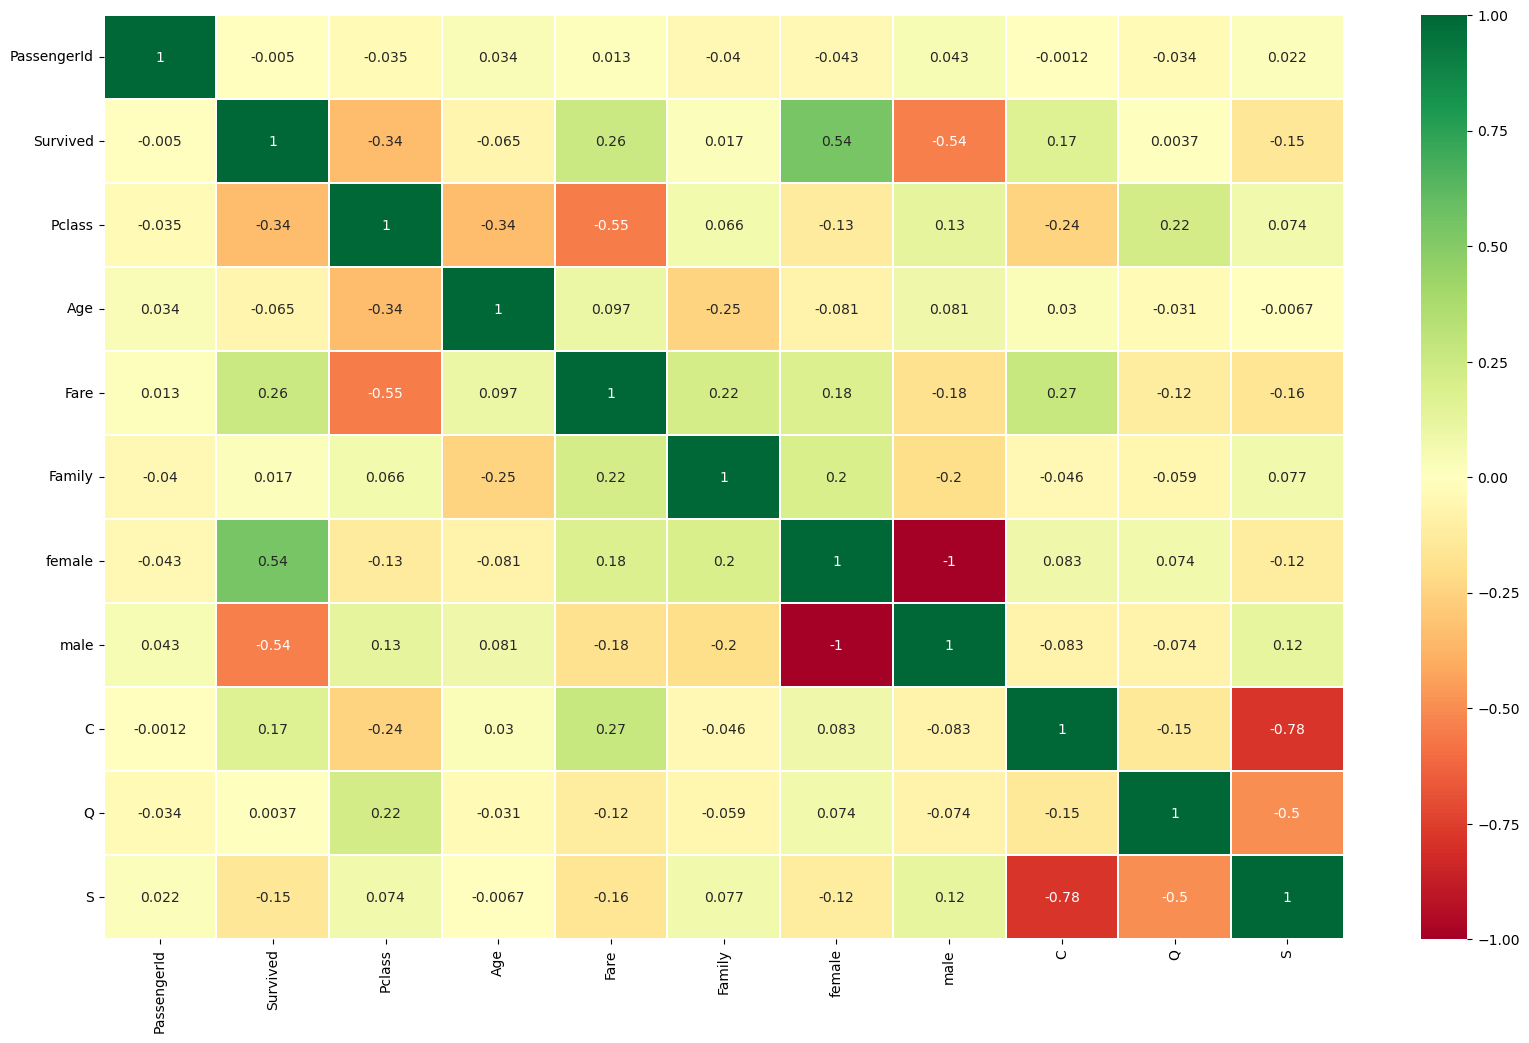

In [187]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

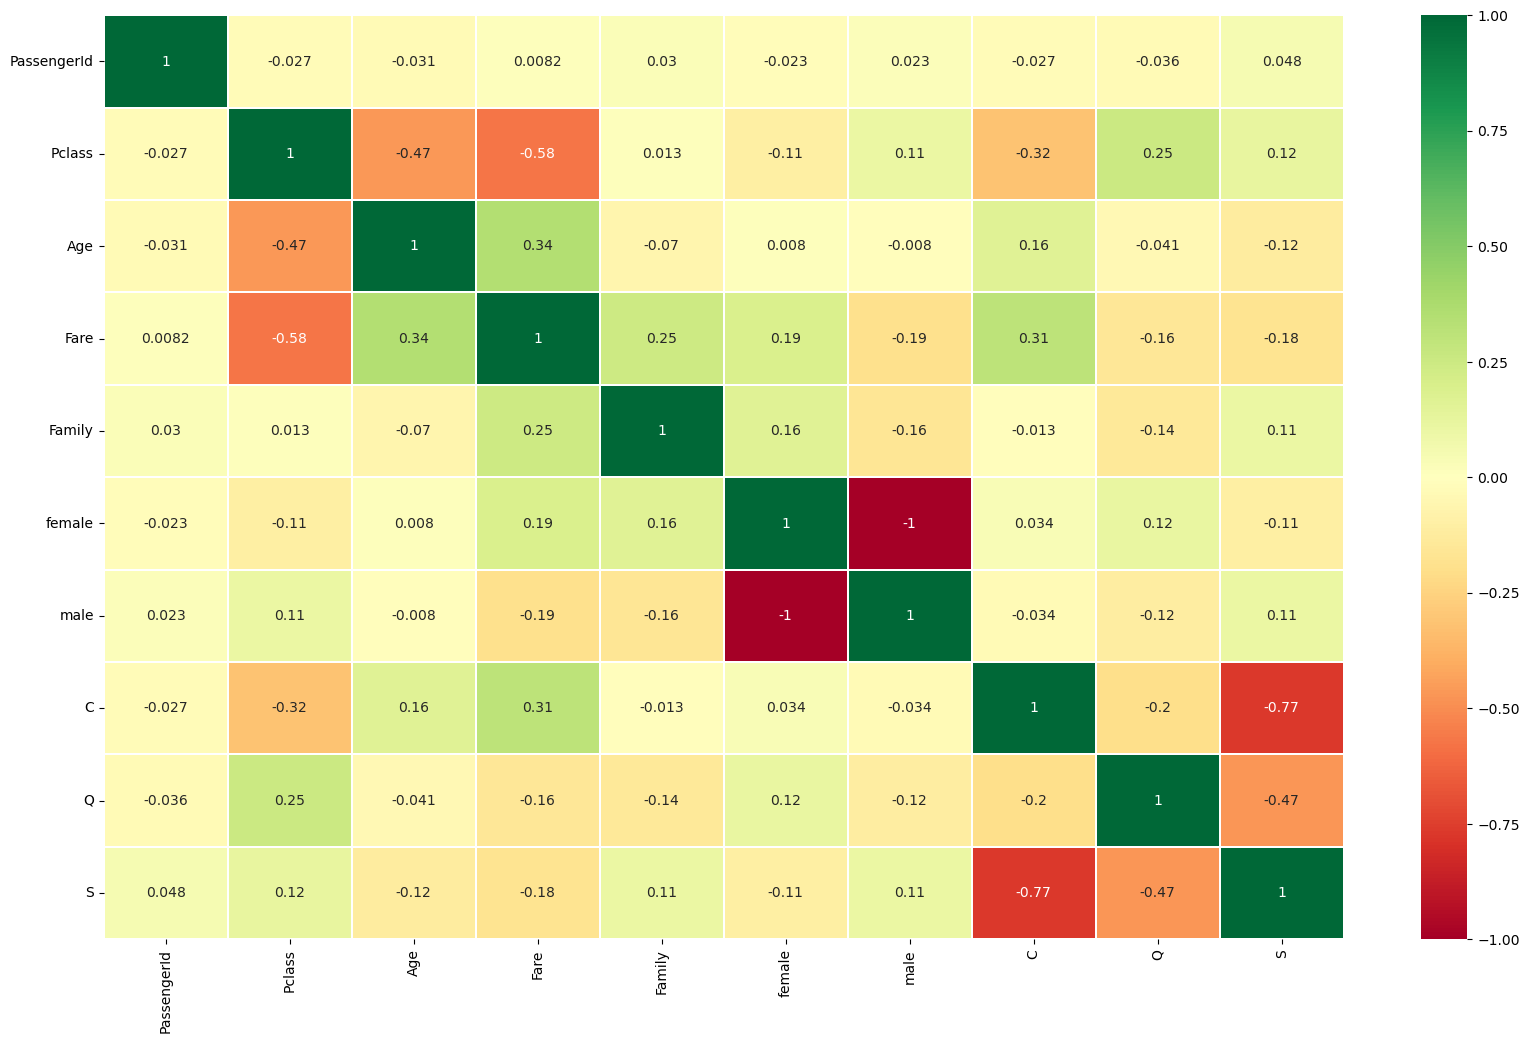

In [188]:
sns.heatmap(test_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

<h2><center>Model Training</h2>

In [189]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1234,stratify=y,shuffle=True)

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import KFold, cross_val_score

In [191]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=150,verbose=0,solver='liblinear')

model = lr.fit(train_x,train_y)

In [192]:
accuracy_score(test_y,model.predict(test_x))

0.8100558659217877

In [193]:
kfold = KFold(n_splits=10,shuffle=True,random_state=1234)

cross_val_score(model,X,y,cv=kfold)

array([0.83333333, 0.84269663, 0.80898876, 0.82022472, 0.78651685,
       0.80898876, 0.78651685, 0.71910112, 0.79775281, 0.80898876])

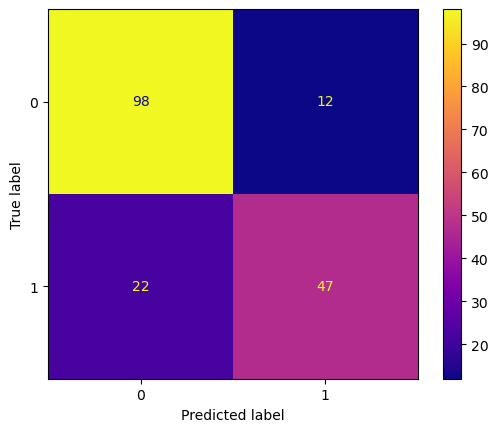

In [194]:
cm = confusion_matrix(test_y,model.predict(test_x))

cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

cmd.plot(cmap='plasma')

In [195]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Family       418 non-null    int64  
 5   female       418 non-null    uint8  
 6   male         418 non-null    uint8  
 7   C            418 non-null    uint8  
 8   Q            418 non-null    uint8  
 9   S            418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [206]:
survived = model.predict(test_df)

In [207]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": survived})

In [208]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [209]:
submission.shape

(418, 2)

In [210]:
submission.to_csv(path_or_buf='submission.csv',index=False)

In [211]:
data = pd.read_csv('submission.csv')

In [212]:
data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
